In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
pd.set_option('display.max_columns', None)

In [238]:
base_url = "https://raw.githubusercontent.com/pranta-iitp/Real-Estate-Property-Price-Prediction-Project/main/gurgaon_properties_cleaned_v2.csv"
df = pd.read_csv(base_url)

In [239]:
df.head(4)

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,west,Relatively New,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,west,Old Property,NaN,NaN,650.0,0,0,0,0,0,1,30
2,flat,tulsiani easy in homes,sector 33,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,not available,New Property,NaN,NaN,595.0,0,0,0,0,0,0,57
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,not available,Under Construction,NaN,NaN,1200.0,1,0,0,0,0,0,88


In [240]:
df.shape

(3844, 23)

In [241]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3826.0,2.495546,2.938865,0.07,0.93,1.5,2.7,31.5
pricePerSqft,3826.0,13787.698380,22979.329202,4.00,6808.75,9000.0,13750.0,600000.0
area,3826.0,2843.244903,22674.662814,50.00,1212.00,1718.5,2295.0,875000.0
bedRoom,3844.0,3.349116,1.941205,1.00,2.00,3.0,4.0,34.0
bathroom,3844.0,3.409990,1.990470,1.00,2.00,3.0,4.0,34.0
floorNum,3824.0,6.766998,6.016791,0.00,2.00,5.0,10.0,51.0
super_built_up_area,1919.0,1919.904403,762.472602,89.00,1457.00,1828.0,2215.0,10000.0
built_up_area,1766.0,2339.900549,17554.863451,2.00,1081.00,1630.0,2380.5,737147.0
carpet_area,1958.0,2477.535106,22295.471840,15.00,822.50,1292.0,1790.0,607936.0
study room,3844.0,0.188345,0.391039,0.00,0.00,0.0,0.0,1.0


#### 1.price

/tmp/ipython-input-242-2991178108.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{tick:.1f}Cr' for tick in current_ticks])


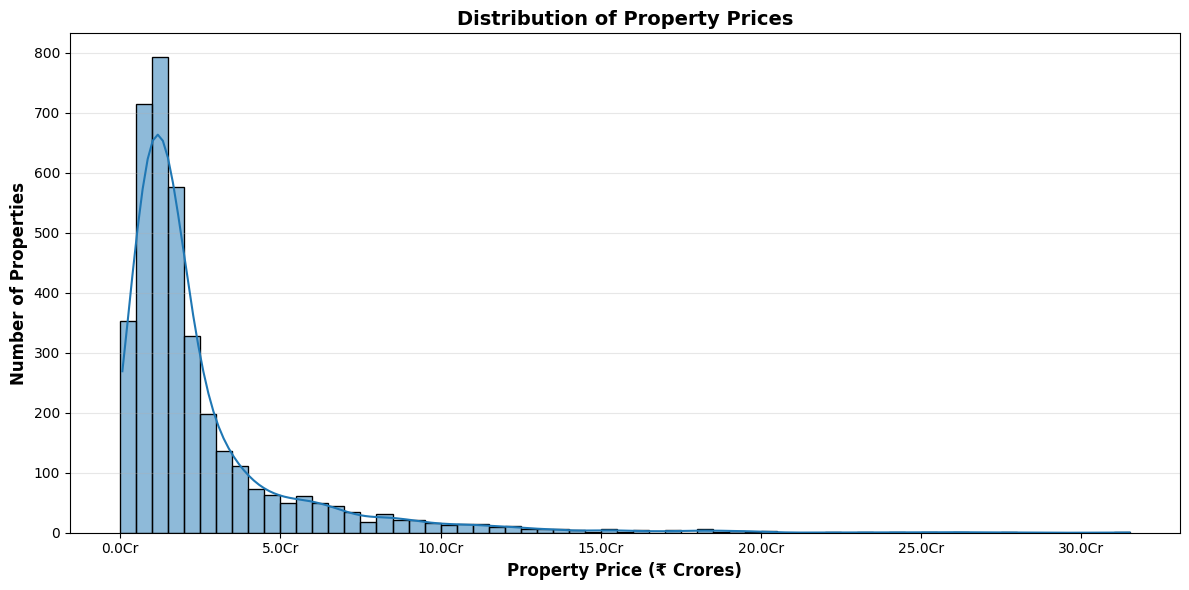

In [242]:
custom_bins = np.arange(0, 32, 0.5)

plt.figure(figsize=(12, 6))
ax = sns.histplot(df['price'], kde=True, bins=custom_bins)

# Format x-axis for crores
plt.xlabel('Property Price (₹ Crores)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Properties', fontsize=12, fontweight='bold')
plt.title('Distribution of Property Prices', fontsize=14, fontweight='bold')

# Add 'Cr' suffix to x-axis labels
current_ticks = ax.get_xticks()
ax.set_xticklabels([f'{tick:.1f}Cr' for tick in current_ticks])

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


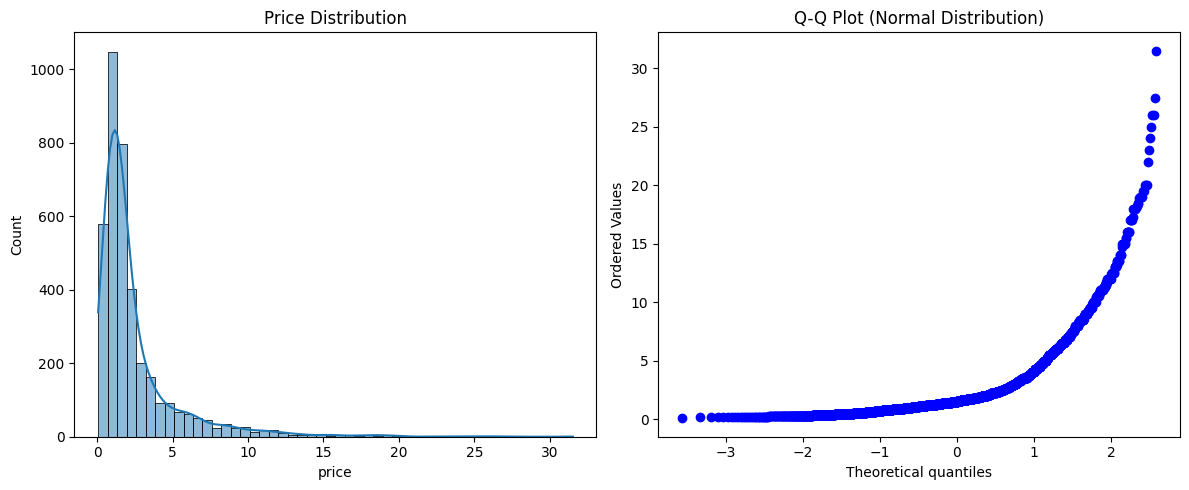

In [243]:
# Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Price Distribution')

# Q-Q plot to assess normality
plt.subplot(1, 2, 2)
from scipy import stats
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Normal Distribution)')
plt.tight_layout()


#### Histogram Analysis - Histogram clearly shows:

* Highly right-skewed distribution - the majority of properties are concentrated in the lower price ranges (0-5 crores)

* Long right tail - extending toward higher prices with very few properties in the 20-31 crore range

* Peak around 2-3 crores - this appears to be the most common price range in your dataset

* Gradual decline - frequency decreases steadily as price increases
#### Q-Q Plot Analysis - The Q-Q plot reveals:

* Significant deviation from normality - the points clearly don't follow the diagonal line

* Heavy right tail - the upper portion curves upward, confirming right skewness

* Non-normal distribution - this validates that your data is not normally distributed

Text(0.5, 0, 'Price (₹ Crores)')

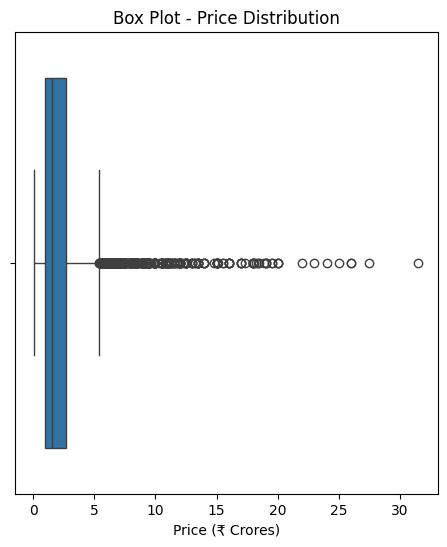

In [244]:
# Create box plot to visualize outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Box Plot - Price Distribution')
plt.xlabel('Price (₹ Crores)')

In [245]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe().T

num_outliers, outliers_price_stats

(434,
 count    434.000000
 mean       9.177627
 std        4.060435
 min        5.400000
 25%        6.300000
 50%        8.000000
 75%       10.557500
 max       31.500000
 Name: price, dtype: float64)

In [246]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score
3756,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,north-east,Moderately Old,NaN,9000.0,NaN,1,0,1,1,1,2,79
3522,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,north-east,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,5,40
3555,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,north-east,New Property,NaN,4545.0,NaN,1,1,0,1,1,3,138
3513,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,north-west,New Property,NaN,400.0,350.0,1,0,1,1,1,5,66
3695,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,north,Moderately Old,NaN,1000.0,NaN,1,0,1,1,1,0,0
3478,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,north-east,Old Property,NaN,400.0,NaN,1,0,0,1,1,5,121
3681,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,south-west,Relatively New,NaN,9000.0,NaN,1,0,1,1,1,5,151
3496,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,not available,Moderately Old,NaN,1000.0,NaN,0,0,0,0,1,0,65
3471,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,north-east,New Property,NaN,4518.0,NaN,1,0,1,1,1,5,154
3605,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,west,Relatively New,NaN,4500.0,NaN,0,0,0,1,1,2,103


#### on the basis of price col we can say that there are some genuine outliers but there are some data erros as well. We will examine next column pricePerSqft to get more idea about outliers of previous column

#### 2.pricePerSqft

In [247]:
df['pricePerSqft'].describe().T

,pricePerSqft
count,3826.000000
mean,13787.698380
std,22979.329202
min,4.000000
25%,6808.750000
50%,9000.000000
75%,13750.000000
max,600000.000000


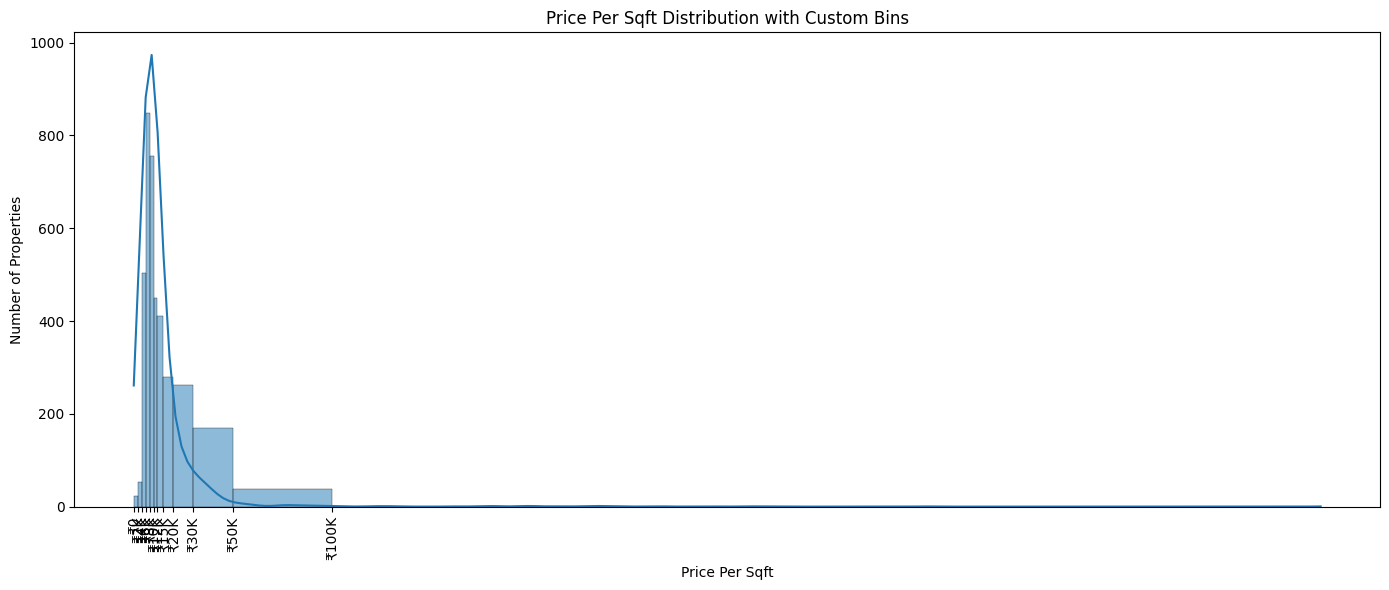

In [248]:
# Create custom bins that make sense for real estate
custom_bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 15000, 20000, 30000, 50000, 100000]

plt.figure(figsize=(14, 6))
ax = sns.histplot(df['pricePerSqft'], bins=custom_bins, kde=True)

# Format x-axis
ax.set_xticks(custom_bins)
ax.set_xticklabels([f'₹{x//1000}K' if x >= 1000 else f'₹{x}' for x in custom_bins])

plt.title('Price Per Sqft Distribution with Custom Bins')
plt.xlabel('Price Per Sqft')
plt.ylabel('Number of Properties')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


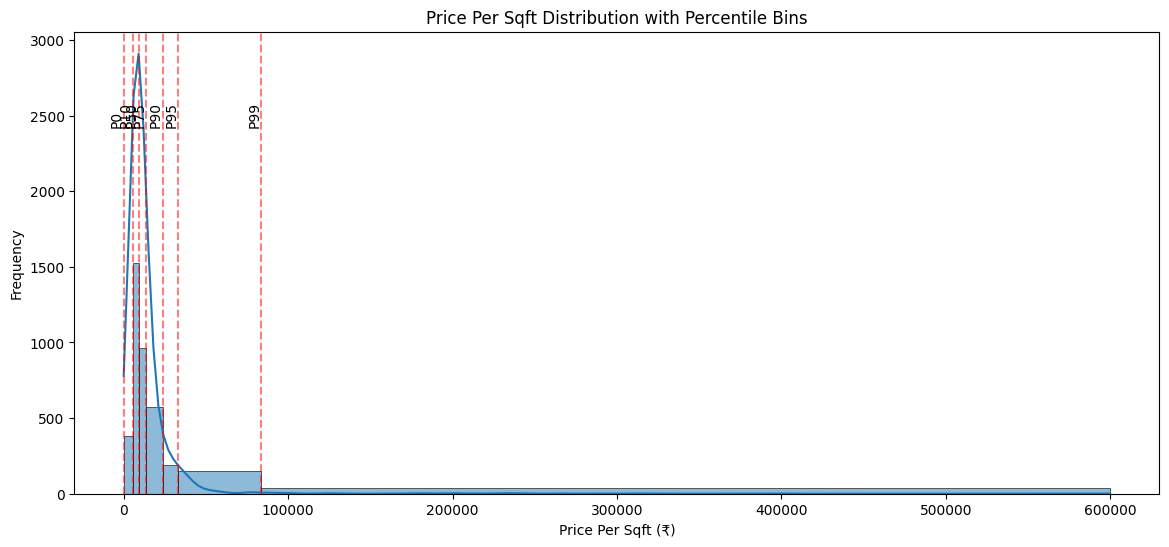

In [249]:
# Create bins based on percentiles
percentiles = [0, 10,  50, 75, 90, 95, 99, 100]
percentile_values = [df['pricePerSqft'].quantile(p/100) for p in percentiles]

plt.figure(figsize=(14, 6))
ax = sns.histplot(df['pricePerSqft'], bins=percentile_values, kde=True)

# Add percentile labels
for i, (p, val) in enumerate(zip(percentiles[:-1], percentile_values[:-1])):
    ax.axvline(val, color='red', linestyle='--', alpha=0.5)
    ax.text(val, ax.get_ylim()[1]*0.8, f'P{p}', rotation=90, ha='right')

plt.title('Price Per Sqft Distribution with Percentile Bins')
plt.xlabel('Price Per Sqft (₹)')
plt.ylabel('Frequency')
plt.show()


#### Extreme Right Skewness: Data shows classic signs of severe right skewness:

* Mean (13,787) >> Median (9,000): This 53% difference indicates heavy right skew

* Huge range: From ₹4 to ₹600,000 per sqft - a 150,000x difference

* Standard deviation (22,979) > Mean (13,787): Confirms high variability and skewness

#### Outlier Impact
* The maximum value of ₹600,000 is an extreme outlier:

* It's 44x higher than the 75th percentile (₹13,750)

* This single value will dominate any standard histogram

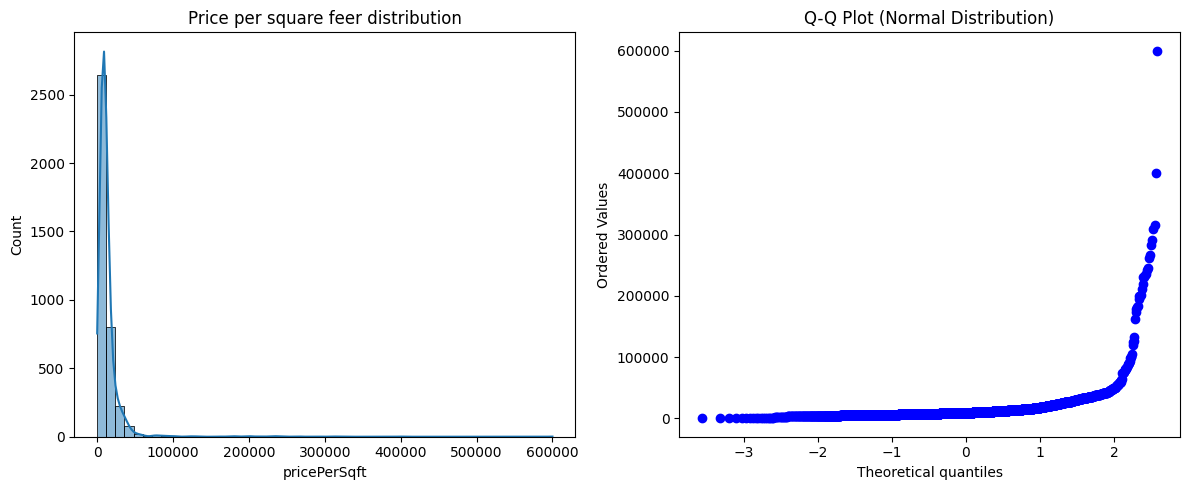

In [250]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['pricePerSqft'], kde=True, bins=50)
plt.title('Price per square feer distribution')

# Q-Q plot to assess normality
plt.subplot(1, 2, 2)
from scipy import stats
stats.probplot(df['pricePerSqft'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Normal Distribution)')
plt.tight_layout()


Text(0.5, 0, 'Price (₹)')

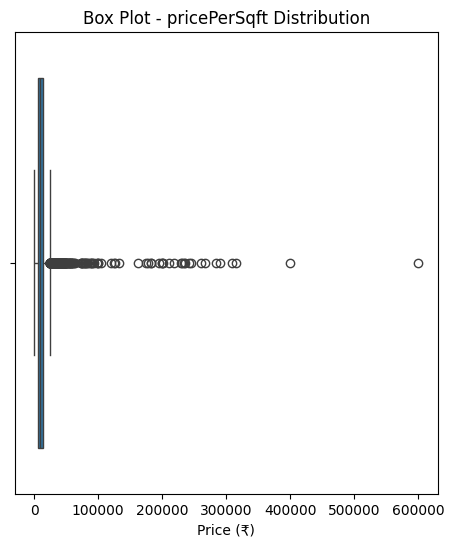

In [251]:
# Create box plot to visualize outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['pricePerSqft'])
plt.title('Box Plot - pricePerSqft Distribution')
plt.xlabel('Price (₹)')

In [252]:
# Calculate the IQR for the 'pricePerSqft' column
Q1 = df['pricePerSqft'].quantile(0.25)
Q3 = df['pricePerSqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['pricePerSqft'] < lower_bound) | (df['pricePerSqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['pricePerSqft'].describe()

# Export outliers to CSV
outliers_sqft.to_csv('pricePerSqft.csv', index=False)

print(f"Exported {num_outliers} outliers to 'pricePerSqft.csv'")
print(f"Outlier statistics:\n{outliers_sqft_stats}")


Exported 372 outliers to 'pricePerSqft.csv'
Outlier statistics:
count       372.000000
mean      52025.793011
std       60402.415075
min       24170.000000
25%       27778.000000
50%       33333.000000
75%       41821.750000
max      600000.000000
Name: pricePerSqft, dtype: float64


#### There is data error in the file. The areas, which are less than 1000, are expressed in square yards. Therefore we multiply by 9 To convert them to square feet

In [253]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

/tmp/ipython-input-253-205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [254]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

/tmp/ipython-input-254-3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [255]:
outliers_sqft['price_per_sqft'].describe().T

,price_per_sqft
count,372.000000
mean,29025.169355
std,12326.220797
min,2689.000000
25%,24990.750000
50%,29494.500000
75%,35423.250000
max,82540.000000


In [256]:
df.update(outliers_sqft)

Text(0.5, 0, 'Price (₹)')

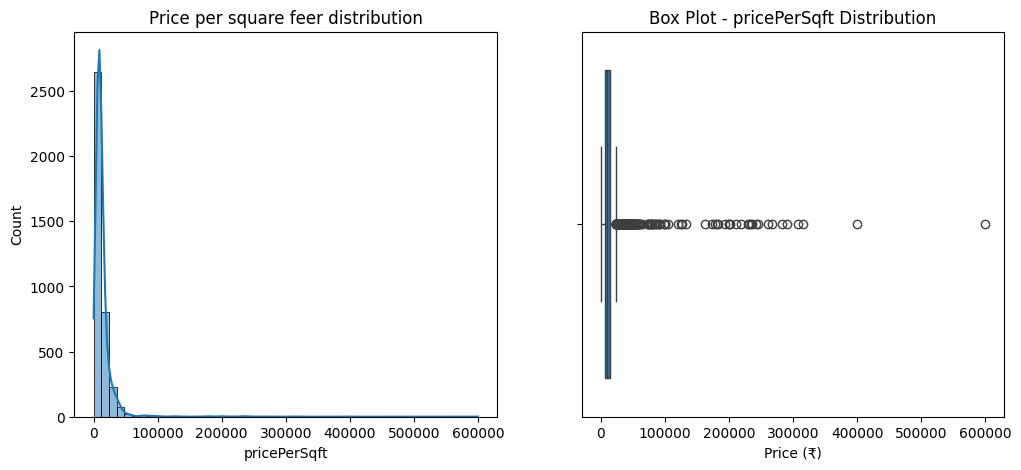

In [257]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['pricePerSqft'], kde=True, bins=50)
plt.title('Price per square feer distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['pricePerSqft'])
plt.title('Box Plot - pricePerSqft Distribution')
plt.xlabel('Price (₹)')

**Outlier Treatment Strategy:**
Statistical outlier detection methods identify numerous extreme values in the pricePerSqft data. However, in real estate markets, exceptionally high prices often represent legitimate luxury properties rather than data anomalies. Therefore, instead of applying traditional statistical outlier removal, we implement domain-specific bounds based on realistic market conditions to filter out implausible values while preserving genuine high-value properties.


In [258]:
# Set realistic real estate price bounds
min_realistic = 500    # Very basic properties in rural/remote areas
max_realistic = 75000  # Ultra-luxury properties in prime locations

# Remove outliers using domain-specific bounds
df_clean = df[(df['pricePerSqft'] >= min_realistic) &
              (df['pricePerSqft'] <= max_realistic)]

print(f"Original dataset size: {len(df)}")
print(f"After removing outliers: {len(df_clean)}")
print(f"Removed {len(df) - len(df_clean)} outliers ({((len(df) - len(df_clean))/len(df)*100):.2f}%)")


Original dataset size: 3844
After removing outliers: 3768
Removed 76 outliers (1.98%)


In [259]:
df_clean.shape

(3768, 23)

Text(0.5, 0, 'Price (₹)')

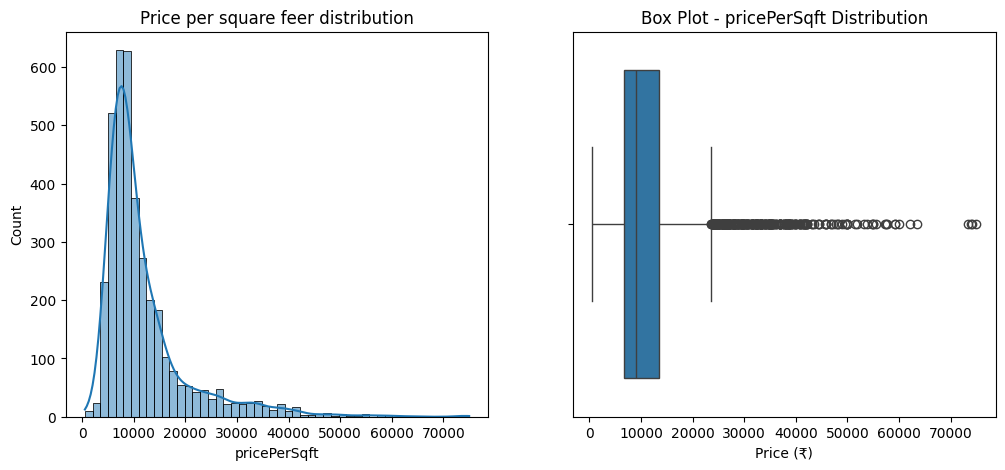

In [260]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['pricePerSqft'], kde=True, bins=50)
plt.title('Price per square feer distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['pricePerSqft'])
plt.title('Box Plot - pricePerSqft Distribution')
plt.xlabel('Price (₹)')

In [261]:
# Still there are some outliers but the maximum Price per square feet range is now under 75,000.

#### 4.area

Text(0.5, 0, 'Price (₹)')

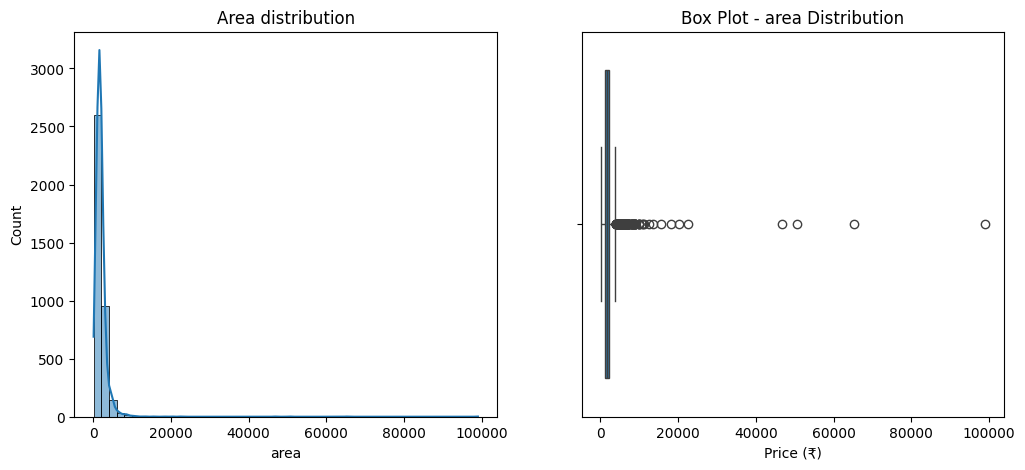

In [262]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['area'], kde=True, bins=50)
plt.title('Area distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['area'])
plt.title('Box Plot - area Distribution')
plt.xlabel('Price (₹)')

In [263]:
df_clean['area'].describe()

,area
count,3768.000000
mean,2025.065021
std,2556.128632
min,145.000000
25%,1251.750000
50%,1742.500000
75%,2320.000000
max,98978.000000


In [264]:
df_clean[df_clean['area'] > 15000]

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score
2405,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,north-east,Under Construction,NaN,NaN,18122.0,1,1,0,1,0,5,42
3059,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,north-east,New Property,NaN,2660.0,2500.0,0,0,0,0,1,5,52
3066,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,north-east,Moderately Old,NaN,2160.0,1720.0,0,0,0,0,1,0,168
3323,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,not available,Undefined,NaN,NaN,7250.0,0,0,0,0,0,0,0
3508,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,north-west,Relatively New,NaN,5800.0,5200.0,0,0,1,0,1,1,112
3570,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,east,Moderately Old,NaN,2850.0,2250.0,1,1,0,1,1,5,126
3596,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,south,Relatively New,NaN,NaN,11000.0,0,0,1,1,1,5,55
3649,house,independent,sector 51,5.50,1087.0,50598.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,8,8,2,3.0,north-east,Relatively New,NaN,8260.0,4860.0,0,0,0,1,0,5,44


**Area Column Analysis**
For the area column, our investigation revealed that while statistical methods flag certain large properties as outliers, these values often represent legitimate luxury estates, farmhouses, or premium properties. Therefore, we retain these properties to ensure our model can accurately predict prices across the complete market spectrum.

In [265]:
# Just removing the rows, because There are other features are not sounds realistic with the area value
df_clean.drop(index=[3066,3323,3508], inplace=True)

/tmp/ipython-input-265-2262532818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(index=[3066,3323,3508], inplace=True)


In [266]:
df_clean.shape

(3765, 23)

Text(0.5, 0, 'Area (sqft)')

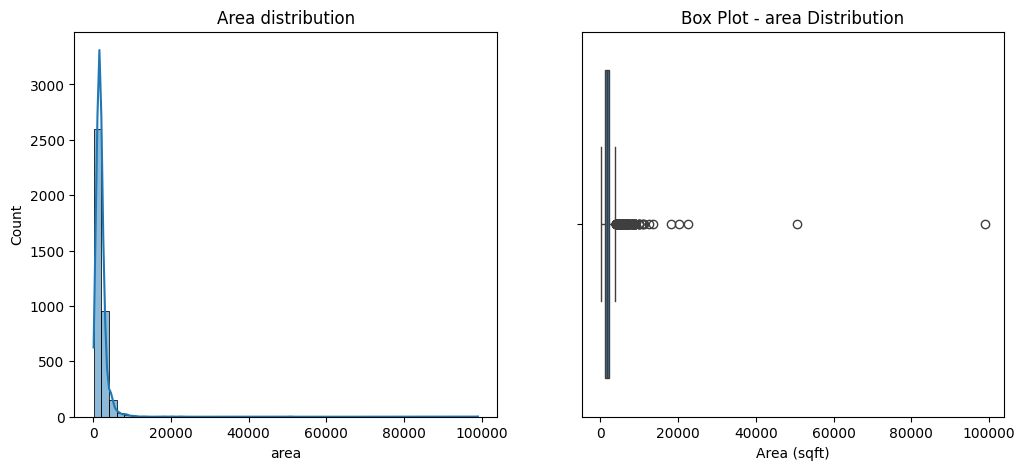

In [267]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['area'], kde=True, bins=50)
plt.title('Area distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['area'])
plt.title('Box Plot - area Distribution')
plt.xlabel('Area (sqft)')

In [268]:
df_clean['area'].describe()

,area
count,3765.000000
mean,1992.804781
std,2212.462479
min,145.000000
25%,1251.000000
50%,1741.000000
75%,2315.000000
max,98978.000000


#### 5.bedRoom

Text(0.5, 0, 'Bedroom numbers')

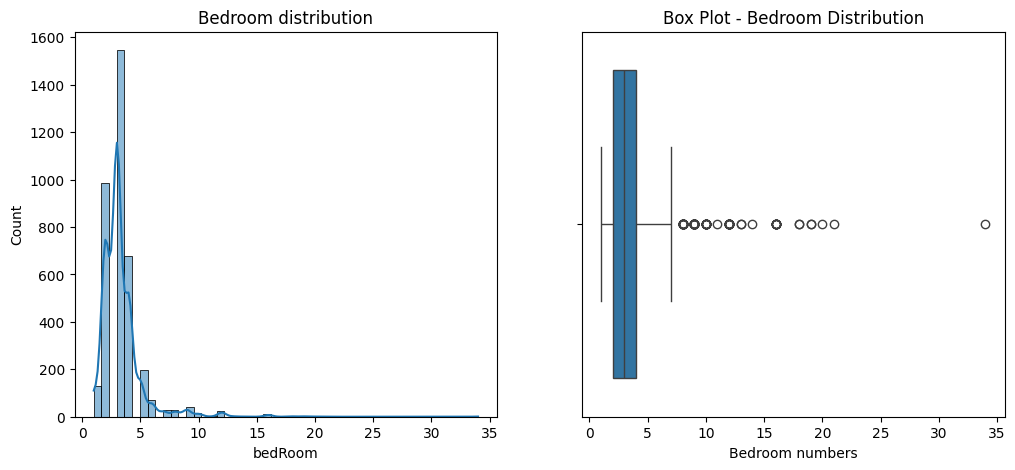

In [269]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['bedRoom'], kde=True, bins=50)
plt.title('Bedroom distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['bedRoom'])
plt.title('Box Plot - Bedroom Distribution')
plt.xlabel('Bedroom numbers')

In [270]:
df_clean['bedRoom'].describe().T

,bedRoom
count,3765.000000
mean,3.306242
std,1.870538
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,34.000000


In [271]:
df_clean[df_clean['bedRoom']>10].sort_values('bedRoom',ascending=True)

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score
3524,house,independent,sector 43,2.25,7500.0,3000.0,Plot area 550(51.1 sq.m.)Built Up area: 3000 s...,11,11,3+,5.0,west,New Property,NaN,3000.0,NaN,0,1,0,0,0,4,26
2956,house,independent,sector 43,3.00,53763.0,5022.0,Plot area 62(51.84 sq.m.),12,12,3+,5.0,west,New Property,NaN,558.0,NaN,0,1,0,0,0,4,20
2990,house,independent,sector 55,7.49,27741.0,2700.0,Plot area 300(250.84 sq.m.),12,12,3+,4.0,south-east,Relatively New,NaN,2700.0,NaN,1,0,0,1,1,5,44
2986,house,floor wise designer kothi,sector 25,13.00,48148.0,2700.0,Plot area 300(250.84 sq.m.),12,16,3+,4.0,north-east,New Property,NaN,2700.0,NaN,1,0,1,1,1,5,135
3164,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,north,New Property,NaN,1600.0,NaN,0,0,0,0,0,5,115
3026,house,independent,sector 56,11.50,42032.0,2736.0,Plot area 304(254.18 sq.m.),12,13,3+,4.0,west,Relatively New,NaN,2736.0,NaN,1,0,0,1,1,5,44
3012,house,independent,sector 40,9.50,40135.0,2367.0,Plot area 263(219.9 sq.m.),12,12,3+,4.0,not available,New Property,NaN,2367.0,NaN,0,0,1,0,0,5,50
2992,house,independent,sector 56,11.95,43534.0,2745.0,Plot area 305(255.02 sq.m.),12,12,3+,4.0,west,Relatively New,NaN,2745.0,NaN,0,0,0,0,1,5,20
3594,house,independent,sector 14,8.00,17707.0,4518.0,Plot area 502(419.74 sq.m.),12,4,3+,3.0,north,Old Property,NaN,4518.0,NaN,0,0,1,0,1,0,30
3534,house,independent,sector 46,6.50,27461.0,2367.0,Plot area 263(219.9 sq.m.),12,12,3+,4.0,north-west,Relatively New,NaN,2367.0,NaN,1,0,0,1,0,5,30


In [272]:
# Calculate the IQR for the 'pricePerSqft' column
Q1 = df_clean['bedRoom'].quantile(0.25)
Q3 = df_clean['bedRoom'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df_clean[(df_clean['bedRoom'] < lower_bound) | (df_clean['bedRoom'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['bedRoom'].describe()

# Export outliers to CSV
#outliers_sqft.to_csv('pricePerSqft.csv', index=False)

#print(f"Exported {num_outliers} outliers to 'pricePerSqft.csv'")
print(f"Outlier statistics:\n{outliers_sqft_stats}")


Outlier statistics:
count    128.000000
mean      10.804688
std        3.600216
min        8.000000
25%        9.000000
50%        9.000000
75%       12.000000
max       34.000000
Name: bedRoom, dtype: float64


In [273]:
# record 3594 has not convincing other values. So, we drop it
df_clean.drop(index=[3594], inplace=True)

/tmp/ipython-input-273-1152306541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(index=[3594], inplace=True)


In [274]:
df_clean['bedRoom'].describe()

,bedRoom
count,3764.000000
mean,3.303932
std,1.865409
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,34.000000


In [275]:
# There are some bedrooms which looks outliers. But those are realistic in luxury apartments
# Bathrooms also show similar trends like bedrooms.

#### 6.super_built_up_area

In [276]:
df_clean['super_built_up_area'].describe().T

,super_built_up_area
count,1919.000000
mean,1919.904403
std,762.472602
min,89.000000
25%,1457.000000
50%,1828.000000
75%,2215.000000
max,10000.000000


Text(0.5, 0, 'super_built_up_area numbers')

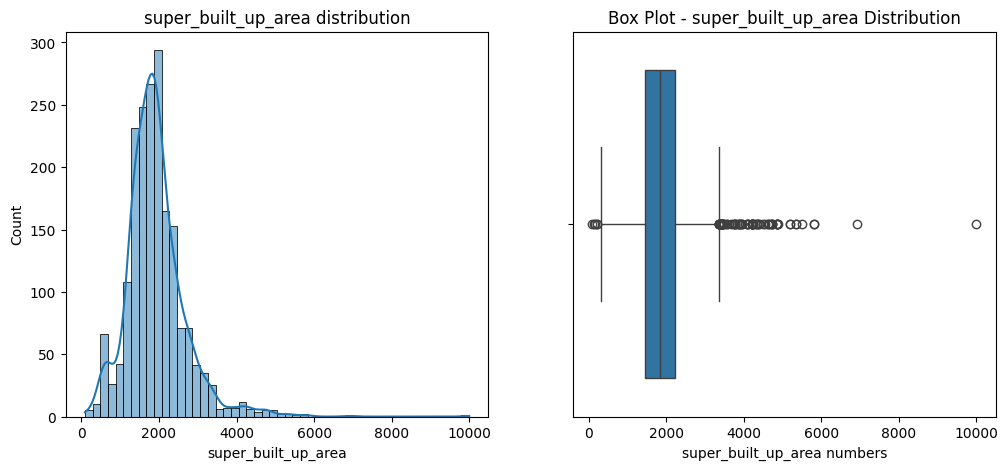

In [277]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['super_built_up_area'], kde=True, bins=50)
plt.title('super_built_up_area distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['super_built_up_area'])
plt.title('Box Plot - super_built_up_area Distribution')
plt.xlabel('super_built_up_area numbers')

In [278]:
df_clean[df_clean['super_built_up_area'] > 6000]

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score
662,flat,krrish provence estate,sector 2,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,north-east,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,46
1532,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,north,Relatively New,6926.0,NaN,NaN,0,0,0,0,1,1,172


In [279]:
# Does not look have any issue

6.built_up_area

Text(0.5, 0, 'built_up_area numbers')

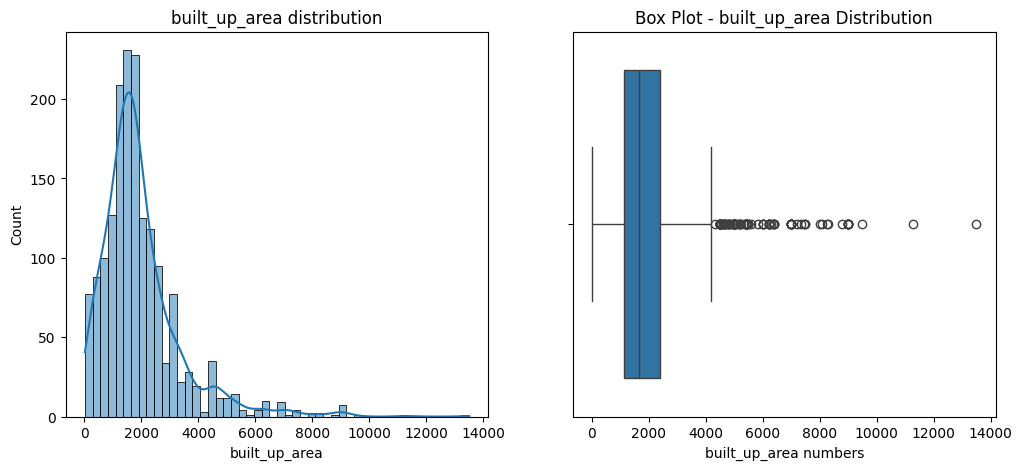

In [280]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['built_up_area'], kde=True, bins=50)
plt.title('built_up_area distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['built_up_area'])
plt.title('Box Plot - built_up_area Distribution')
plt.xlabel('built_up_area numbers')

In [281]:
df_sorted = df_clean[df_clean['built_up_area'] > 6000][['price', 'pricePerSqft', 'area', 'built_up_area','luxury_score']].sort_values(by='price', ascending=False)

In [282]:
df_sorted

,price,pricePerSqft,area,built_up_area,luxury_score
3756,31.50,35000.0,9000.0,9000.0,79
3522,27.50,24366.0,11286.0,11286.0,40
3681,23.00,25556.0,9000.0,9000.0,151
3619,19.50,27083.0,7200.0,7200.0,109
3020,19.50,22222.0,8775.0,8775.0,127
3512,18.50,26428.0,7000.0,7000.0,38
3413,18.02,28200.0,6390.0,6390.0,151
3656,17.00,35109.0,4842.0,9000.0,85
3706,15.10,18605.0,8116.0,8067.8,132
3569,15.00,23437.0,6400.0,6400.0,120


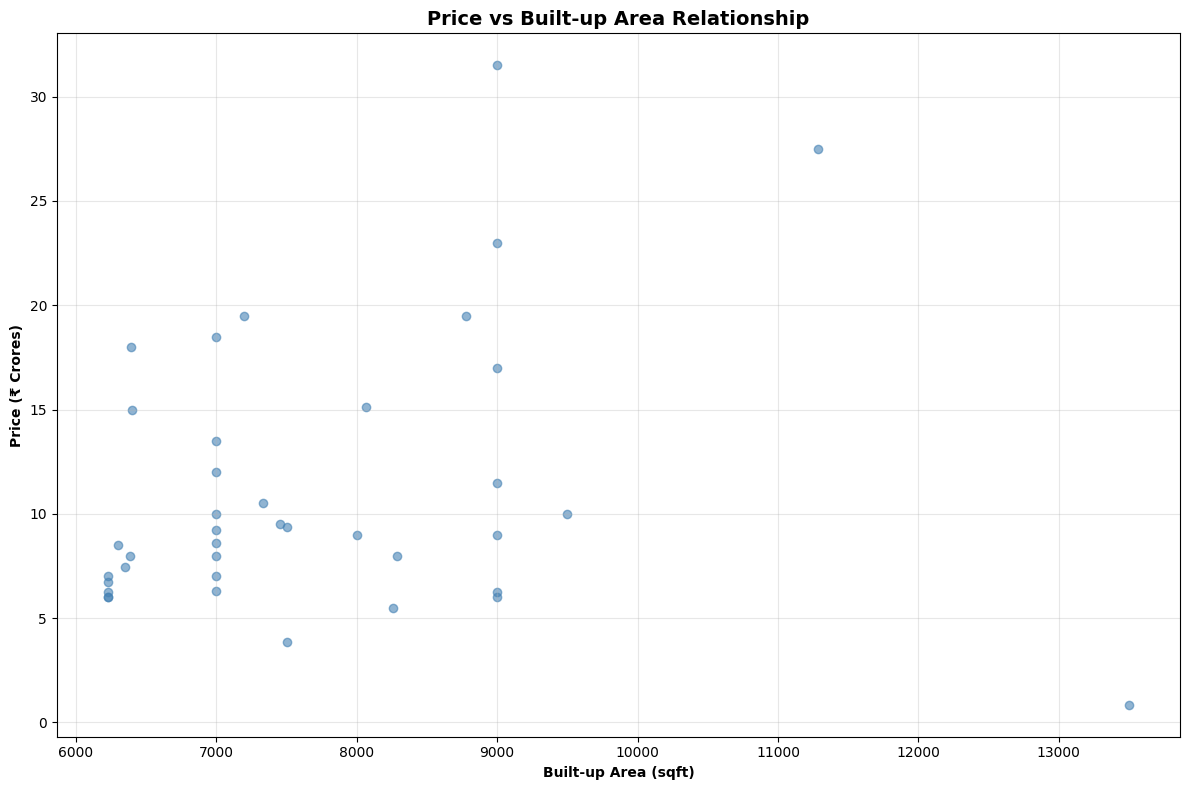

In [283]:
# Basic scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_sorted['built_up_area'], df_sorted['price'], alpha=0.6, color='steelblue')
plt.xlabel('Built-up Area (sqft)', fontweight='bold')
plt.ylabel('Price (₹ Crores)', fontweight='bold')
plt.title('Price vs Built-up Area Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [284]:
# There are few flats which have built_up_area more than 6000 but they have very low price. So, we are removing those.
df_clean.drop(index=[3052, 3398, 3468, 3211], inplace=True)

/tmp/ipython-input-284-1523163841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(index=[3052, 3398, 3468, 3211], inplace=True)


Text(0.5, 0, 'built_up_area numbers')

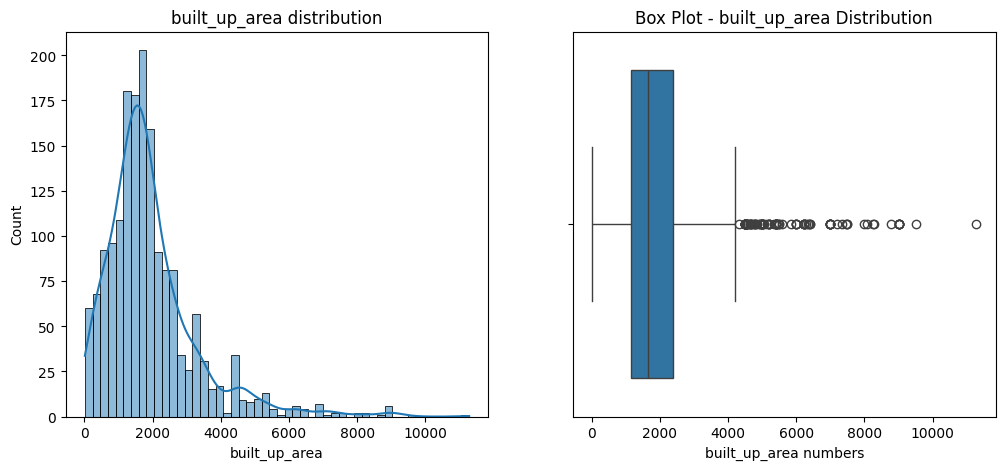

In [285]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['built_up_area'], kde=True, bins=50)
plt.title('built_up_area distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['built_up_area'])
plt.title('Box Plot - built_up_area Distribution')
plt.xlabel('built_up_area numbers')

#### 7.carpet_area

Text(0.5, 0, 'carpet_area numbers')

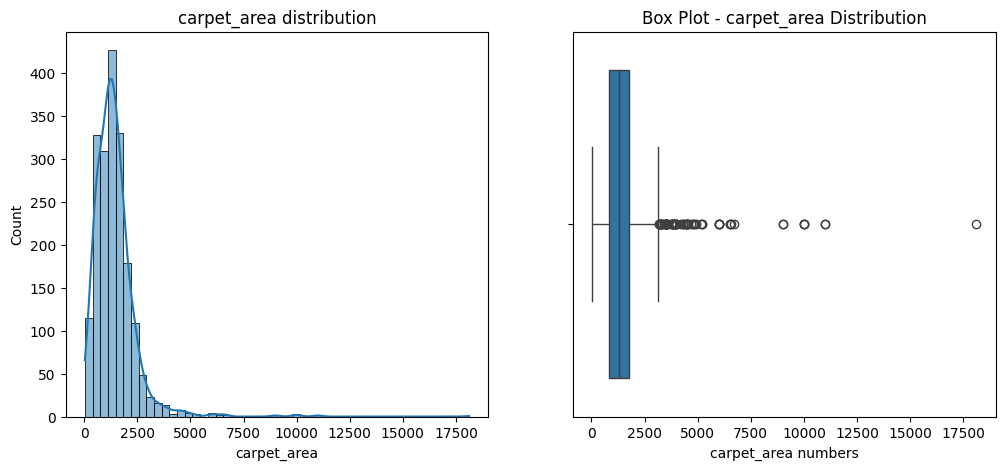

In [286]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['carpet_area'], kde=True, bins=50)
plt.title('carpet_area distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['carpet_area'])
plt.title('Box Plot - carpet_area Distribution')
plt.xlabel('carpet_area numbers')

In [287]:
df_sorted = df_clean[df_clean['carpet_area'] > 10000][['price', 'pricePerSqft', 'area', 'carpet_area','luxury_score']].sort_values(by='price', ascending=False)

In [288]:
df_sorted

,price,pricePerSqft,area,carpet_area,luxury_score
3596,18.4,1859.0,98978.0,11000.0,55
1626,13.2,12000.0,11000.0,11000.0,80
2405,2.5,1379.0,18129.0,18122.0,42


In [289]:
# No need of any outlier treatment in carpet_area column

#### 8.luxury_score

Text(0.5, 0, 'luxury_score values')

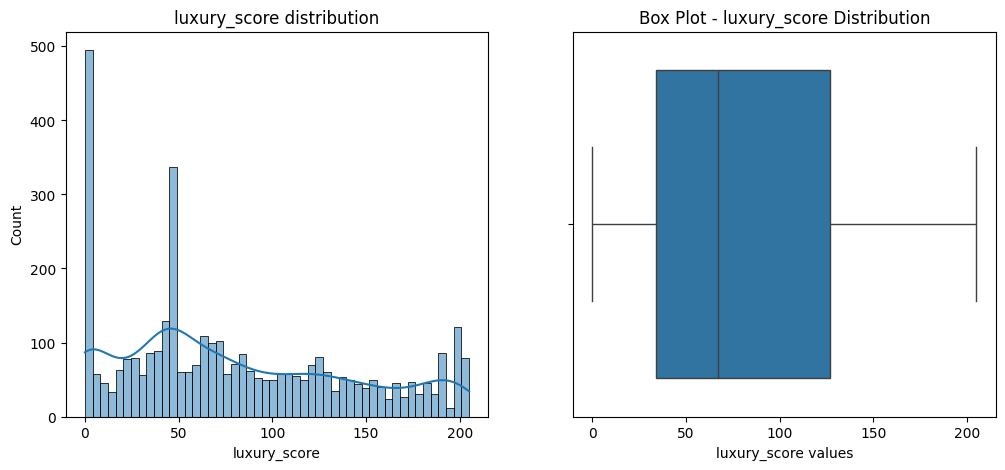

In [290]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['luxury_score'], kde=True, bins=50)
plt.title('luxury_score distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['luxury_score'])
plt.title('Box Plot - luxury_score Distribution')
plt.xlabel('luxury_score values')

In [291]:
df_clean['luxury_score'].describe().T

,luxury_score
count,3760.000000
mean,80.426596
std,61.250722
min,0.000000
25%,34.000000
50%,67.000000
75%,127.000000
max,205.000000


In [292]:
df_clean.shape

(3760, 23)

In [293]:
df_sorted = df_clean[(df_clean['luxury_score'] == 0) & (df_clean['price'] >3.5)][['price', 'pricePerSqft', 'area', 'carpet_area','luxury_score']].sort_values(by='price', ascending=False)

In [294]:
df_sorted.shape

(52, 5)

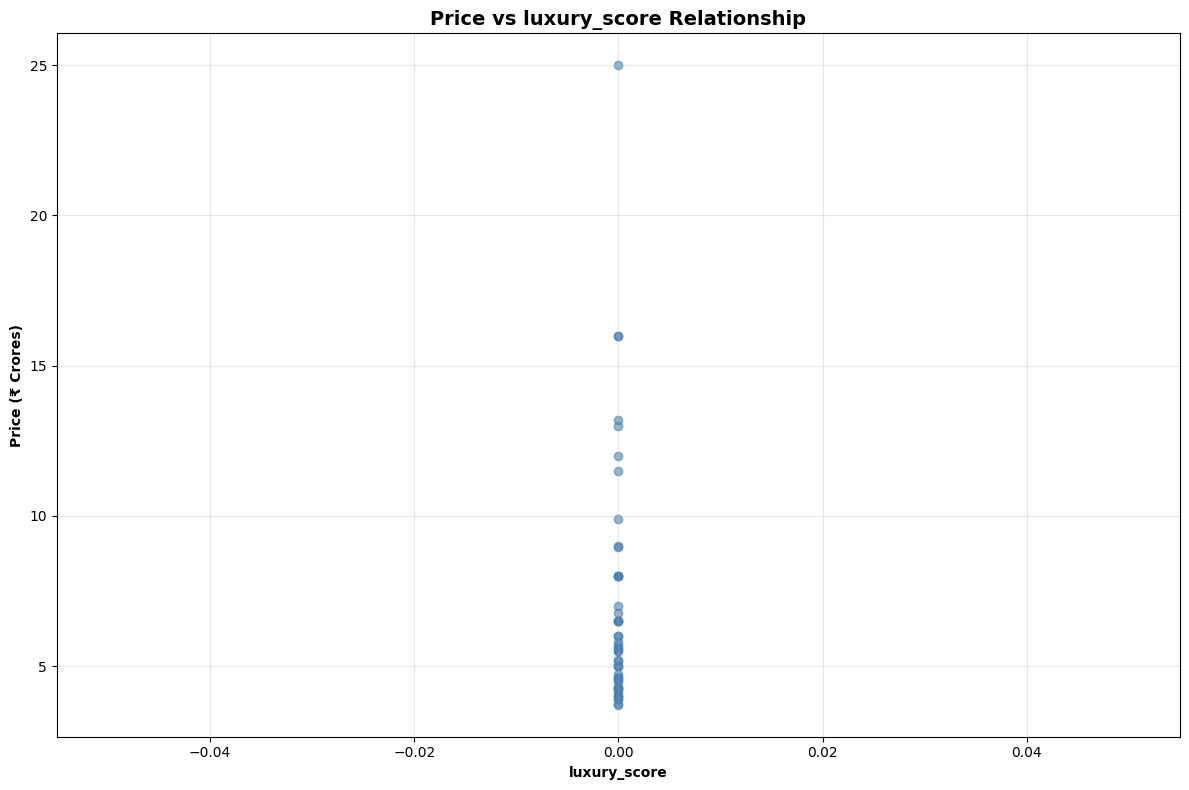

In [295]:
# Basic scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_sorted['luxury_score'], df_sorted['price'], alpha=0.6, color='steelblue')
plt.xlabel('luxury_score', fontweight='bold')
plt.ylabel('Price (₹ Crores)', fontweight='bold')
plt.title('Price vs luxury_score Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [296]:
# We are removing those columns where luxury_score is 0 but price is more that 3.5 crore
df_filtered = df_clean[~((df_clean['luxury_score'] == 0) & (df_clean['price'] >3.5))]

In [297]:
df_filtered.shape

(3708, 23)

In [298]:
df_filtered['pricePerSqft'] = round((df_filtered['price']*10000000)/df_filtered['area'])

/tmp/ipython-input-298-2933805263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pricePerSqft'] = round((df_filtered['price']*10000000)/df_filtered['area'])


Text(0.5, 0, 'pricePerSqft values')

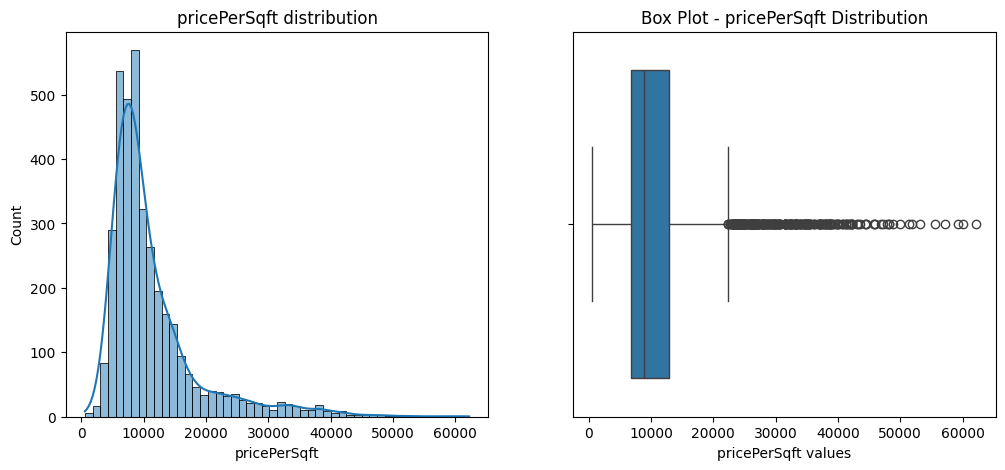

In [299]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['pricePerSqft'], kde=True, bins=50)
plt.title('pricePerSqft distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['pricePerSqft'])
plt.title('Box Plot - pricePerSqft Distribution')
plt.xlabel('pricePerSqft values')

In [300]:
df_filtered['pricePerSqft'].describe().T

,pricePerSqft
count,3708.000000
mean,11319.437433
std,7604.177975
min,544.000000
25%,6702.000000
50%,8836.500000
75%,12950.250000
max,62222.000000


In [301]:
df_sorted = df_filtered[df_filtered['pricePerSqft'] > 50000]

In [302]:
df_sorted

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score
3164,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,north,New Property,NaN,1600.0,NaN,0,0,0,0,0,5,115
3470,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,east,New Property,NaN,2844.0,NaN,1,0,1,1,1,1,154
3555,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,north-east,New Property,NaN,4545.0,NaN,1,1,0,1,1,3,138
3641,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,north,Old Property,NaN,2250.0,NaN,1,0,0,0,1,1,173
3708,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,east,Moderately Old,NaN,3240.0,NaN,1,0,0,1,1,2,88
3720,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,west,New Property,NaN,325.0,300.0,1,0,1,1,1,5,65
3748,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,north,Relatively New,NaN,250.0,200.0,1,0,1,1,1,5,109
3816,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,south,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,3,141


Text(0.5, 0, 'pricePerSqft values')

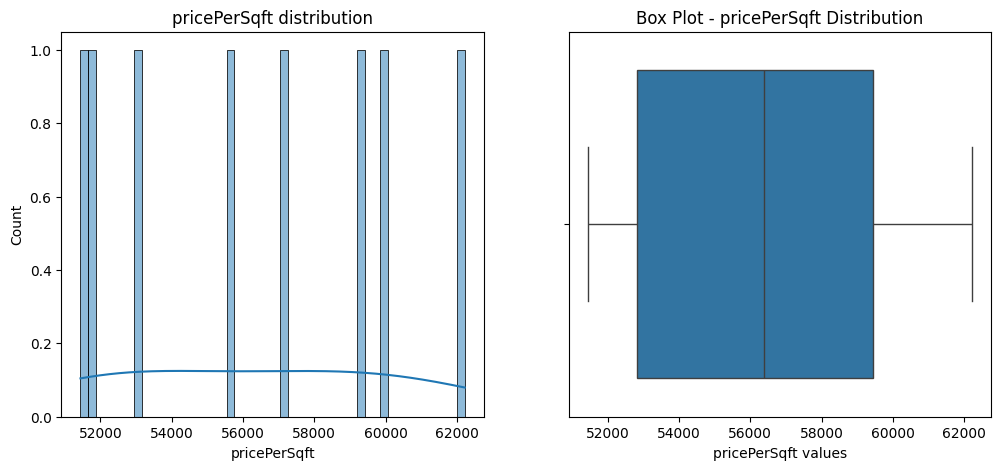

In [303]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_sorted['pricePerSqft'], kde=True, bins=50)
plt.title('pricePerSqft distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_sorted['pricePerSqft'])
plt.title('Box Plot - pricePerSqft Distribution')
plt.xlabel('pricePerSqft values')

In [304]:
df_filtered.shape

(3708, 23)

In [305]:
# Let's investigate area per bedroom.

In [306]:
# Calculate area per bedroom
df_filtered['area_per_bedroom'] = df_filtered['area'] / df_filtered['bedRoom']

# Display basic statistics
print("Area per Bedroom Statistics:")
print(df_filtered['area_per_bedroom'].describe())


Area per Bedroom Statistics:
count     3708.000000
mean       614.811049
std        407.885935
min         51.428571
25%        458.312500
50%        600.000000
75%        710.750000
max      16496.333333
Name: area_per_bedroom, dtype: float64


/tmp/ipython-input-306-983246427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['area_per_bedroom'] = df_filtered['area'] / df_filtered['bedRoom']


#### While investigating area per bedrooms, we got
* Minimum (51.429 sq ft/bedroom): Extremely cramped, likely data errors or studio apartments miscategorized

* 25th percentile (458.3 sq ft/bedroom): Represents compact but reasonable bedroom sizes

* Median (600 sq ft/bedroom): Aligns with standard residential norms

* 75th percentile (710.75 sq ft/bedroom): Spacious bedrooms typical of premium properties

* Maximum (16,496 sq ft/bedroom): Clearly an outlier, likely indicating data quality issues

In [307]:
df_filtered['area_per_bedroom'].sample(3)

,area_per_bedroom
653,767.00
3170,460.00
1027,547.75


Text(0.5, 0, 'area_per_bedroom values')

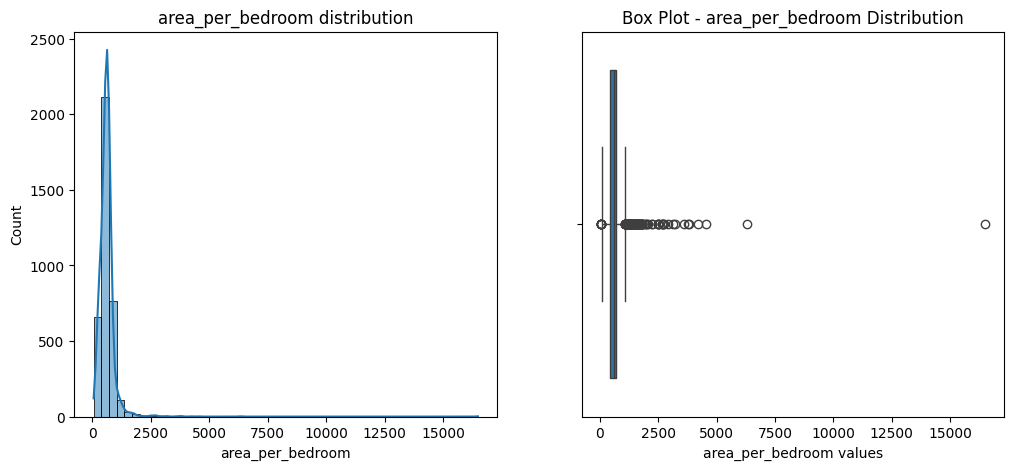

In [308]:
 # Check distribution shape
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['area_per_bedroom'], kde=True, bins=50)
plt.title('area_per_bedroom distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['area_per_bedroom'])
plt.title('Box Plot - area_per_bedroom Distribution')
plt.xlabel('area_per_bedroom values')

In [309]:
# Area per bedroom can not be less than 150 sqft. So first we remove those records

In [310]:
df_filtered = df_filtered[df_filtered['area_per_bedroom'] >= 150]

In [311]:
# Calculate the IQR for the 'price' column
Q1 = df_filtered['area_per_bedroom'].quantile(0.25)
Q3 = df_filtered['area_per_bedroom'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_filtered[(df_filtered['area_per_bedroom'] < lower_bound) | (df_filtered['area_per_bedroom'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['area_per_bedroom'].describe().T

num_outliers, outliers_price_stats

(154,
 count      154.000000
 mean      1678.810214
 std       1414.039495
 min       1081.000000
 25%       1170.625000
 50%       1306.500000
 75%       1650.000000
 max      16496.333333
 Name: area_per_bedroom, dtype: float64)

In [312]:
df_filtered = df_filtered[(df_filtered['area_per_bedroom'] > lower_bound) & (df_filtered['area_per_bedroom'] < upper_bound)]

In [313]:
# Display basic statistics
print("Area per Bedroom Statistics:")
print(df_filtered['area_per_bedroom'].describe())

Area per Bedroom Statistics:
count    3500.000000
mean      575.810747
std       183.057148
min       150.000000
25%       458.625000
50%       592.000000
75%       697.333333
max      1080.000000
Name: area_per_bedroom, dtype: float64


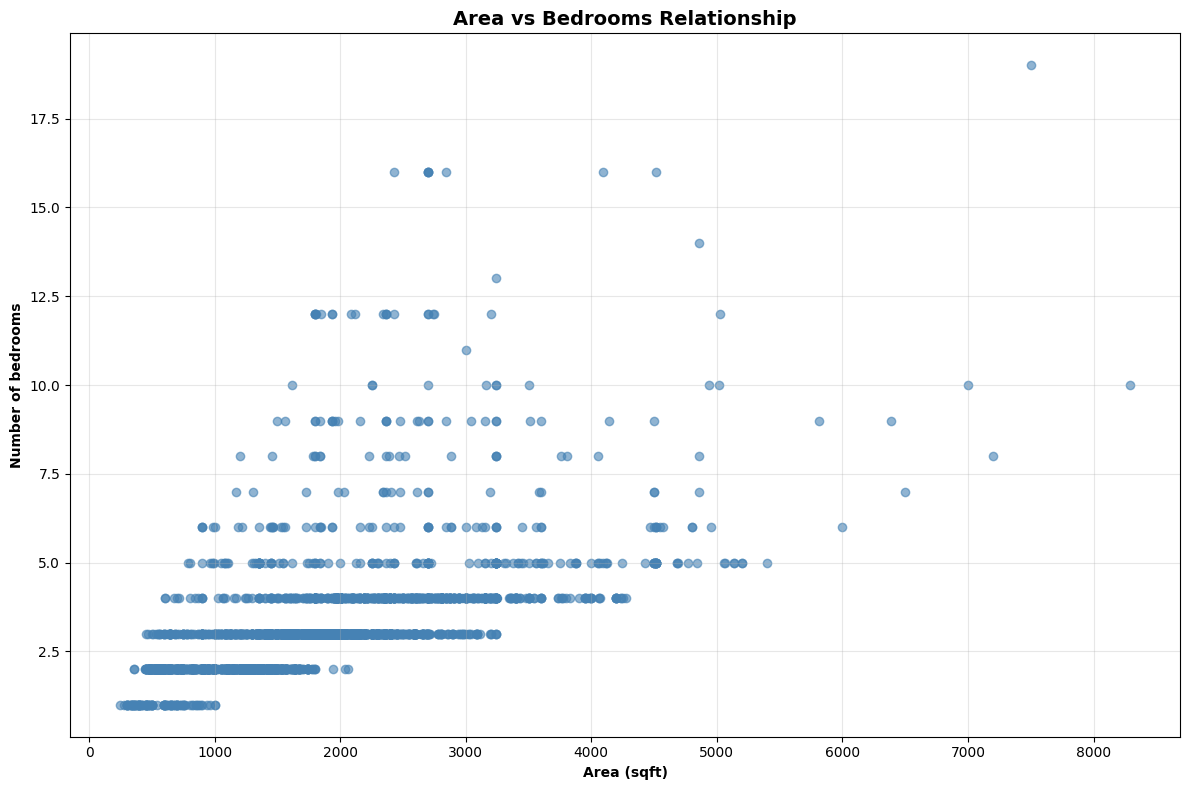

In [314]:
# Basic scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['area'], df_filtered['bedRoom'], alpha=0.6, color='steelblue')
plt.xlabel('Area (sqft)', fontweight='bold')
plt.ylabel('Number of bedrooms', fontweight='bold')
plt.title('Area vs Bedrooms Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [315]:
df_filtered.shape

(3500, 24)

In [316]:
df_filtered.to_csv('outliers_removed_data.csv', index=False)